# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Differenciálszámítás" data-toc-modified-id="Differenciálszámítás-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differenciálszámítás</a></div><div class="lev2 toc-item"><a href="#Határérték" data-toc-modified-id="Határérték-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Határérték</a></div><div class="lev2 toc-item"><a href="#Folytonosság" data-toc-modified-id="Folytonosság-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Folytonosság</a></div><div class="lev2 toc-item"><a href="#Deriválás" data-toc-modified-id="Deriválás-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deriválás</a></div><div class="lev2 toc-item"><a href="#Parciális-deriválás" data-toc-modified-id="Parciális-deriválás-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Parciális deriválás</a></div><div class="lev1 toc-item"><a href="#Szélsőérték-számítás" data-toc-modified-id="Szélsőérték-számítás-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Szélsőérték számítás</a></div><div class="lev2 toc-item"><a href="#Szeparábilis-differenciálegyenletek" data-toc-modified-id="Szeparábilis-differenciálegyenletek-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Szeparábilis differenciálegyenletek</a></div><div class="lev2 toc-item"><a href="#Szeparábilisra-visszavezethető-egyenletek" data-toc-modified-id="Szeparábilisra-visszavezethető-egyenletek-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Szeparábilisra visszavezethető egyenletek</a></div><div class="lev2 toc-item"><a href="#Elsőrendű-egyenletek" data-toc-modified-id="Elsőrendű-egyenletek-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Elsőrendű egyenletek</a></div><div class="lev2 toc-item"><a href="#Másodrendű-állandó-együtthatós-egyenletek" data-toc-modified-id="Másodrendű-állandó-együtthatós-egyenletek-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Másodrendű állandó együtthatós egyenletek</a></div>

<p style="text-align: center; font-family: 'Times New Roman'; font-size:3em; font-style:bold">
Analízis 2 informatikusoknak</p><br>
<p style="text-align: center; font-family: 'Times New Roman'; font-size:1.5em; font-style:bold">(előadás)</p><br>

# Differenciálszámítás

In [64]:
from sympy import *

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
import requests
from IPython.display import HTML,Latex 
import numpy as np
from sympy import *
from mpl_toolkits import mplot3d

In [92]:
init_printing(use_unicode=True) # nice output

In [44]:
x, y, z = symbols('x y z')

In [45]:
a, m, r, theta = symbols('a m r theta') # parameters

In [5]:
def surface_show(rectangle):
    a = rectangle[0]
    b = rectangle[1]
    c = rectangle[2]
    d = rectangle[3]
    xx = np.linspace(a, b, 100)
    yy = np.linspace(c, d, 100)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)
    plt.close()
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

## Határérték

<div class="exercises">
1.) Legyen 
\[
f(x,y):=\frac{x^2 y^2}{x^2 y^2+(x-y)^2}.
\]
Ekkor
\[
\lim_{x\to 0}\left(\lim_{y\to 0} f(x,y) \right)=\lim_{y\to 0}\left(\lim_{x\to 0}f(x,y) \right)=0,
\]
mégsem létezik a határérték.

<IPython.core.display.Javascript object>


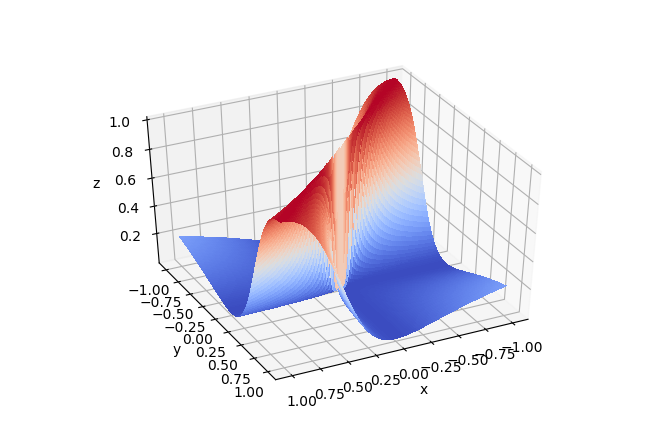

In [10]:
def f(x,y):
    return x**2*y**2/(x**2*y**2+(x-y)**2)

surface_show([-1, 1, -1, 1])

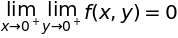

In [10]:
cc = Limit(Limit('f(x,y)',y,0), x, 0)
Eq(cc, Limit(Limit(f(x,y),y,0), x, 0).doit())

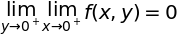

In [11]:
cc = Limit(Limit('f(x,y)',x,0), y, 0)
Eq(cc, Limit(Limit(f(x,y),x,0), y, 0).doit())

In [12]:
print("f(x,x)=", f(x,x))

f(x,x)= 1


<div class="exercises">
2.) Legyen 
\[
f(x,y):=(x+y)\sin\left(\frac{1}{x} \right)\sin\left(\frac{1}{y} \right)
\]
Ekkor a
\[
\lim_{x\to 0}\left(\lim_{y\to 0} f(x,y) \right),\quad\lim_{y\to 0}\left(\lim_{x\to 0}f(x,y) \right)
\]
kettős határértékek nem léteznek, mégis létezik a $\displaystyle{\lim_{(x,y)\to(0,0)}}f(x,y)$ határérték.
</div>

<IPython.core.display.Javascript object>


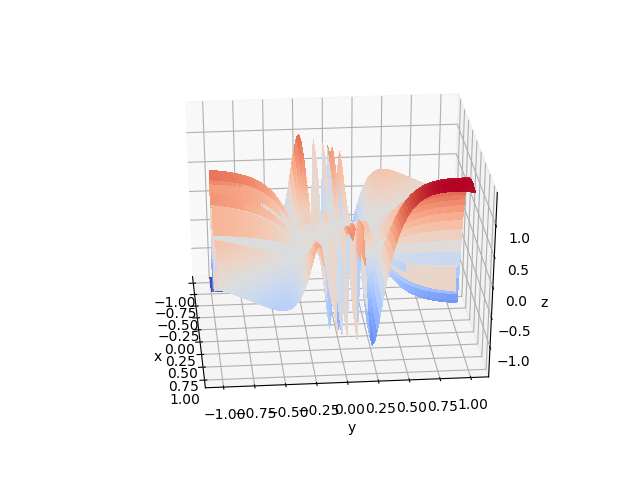

In [11]:
def f(x,y):
    return (x+y)*np.sin(1/x)*np.sin(1/y)

surface_show([-1, 1, -1, 1])

<div class="solution">
\[
0\leq|f(x+y)|\leq|x+y|
\]
</div>

## Folytonosság

<div class="exercises">
1.) Legyen 
\[
                   f(x,y) = 
                   \begin{cases}
                   \frac{x^2y}{x^4+y^2},      & \text{if  } x^2+y^2\neq 0;\\
                   0,        & \text{if  } x^2+y^2=0.
                   \end{cases}
                \]
Ekkor $f$ folytonos az origóban minden az origón áthaladó egyenes mentén, 
de mint kétváltozós függvény nem folytonos az origóban.
</div>

<IPython.core.display.Javascript object>


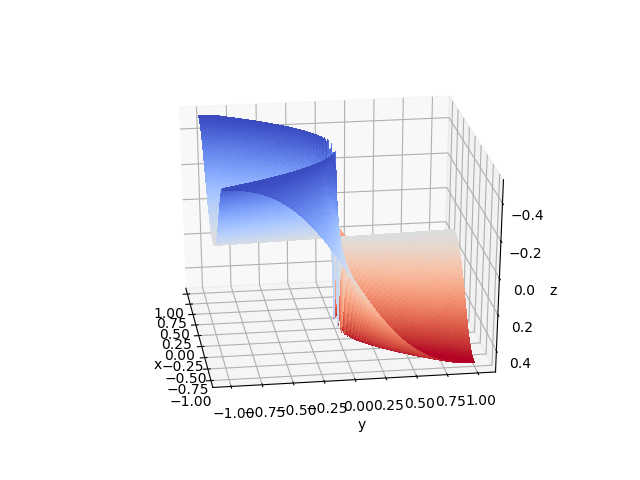

In [6]:
def f(x,y):
    return x**2*y/(x**4+y**2)

surface_show([-1, 1, -1, 1])

In [54]:
display(Latex("$f(x,x^2)= %g$"%f(x, x**2)))

<IPython.core.display.Latex object>

$f(x,mx)$ is {{f(x, m*x)}}

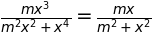

In [55]:
Eq(f(x, m*x), simplify(f(x, m*x)))

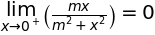

In [45]:
Eq(Limit(lim_f, x, 0), limit(lim_f, x, 0).doit())

## Deriválás

<div class="exercises">
1.) Legyen $A\in L\left(\mathbf{R}^n\right)$ adott lineáris leképezés, 
$\mathbf{x}\in\mathbf{R}^n$, és definiáljuk a következő függvényt
\[
f(\mathbf{x}):=\
\]
</div>

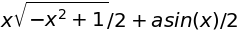

In [17]:
integrate(sqrt(1-x**2), x)

In [21]:
integrate(3*exp(sqrt(x)), x)

## Parciális deriválás

<div class="exercises">
1.) Legyen 
\[
                   f(x,y) = 
                   \begin{cases}
                   \frac{xy^3-x^3y}{x^2+y^2},      & \text{if  } x^2+y^2\neq 0;\\
                   0,        & \text{if  } x^2+y^2=0.
                   \end{cases}
                \]
</div>

<IPython.core.display.Javascript object>


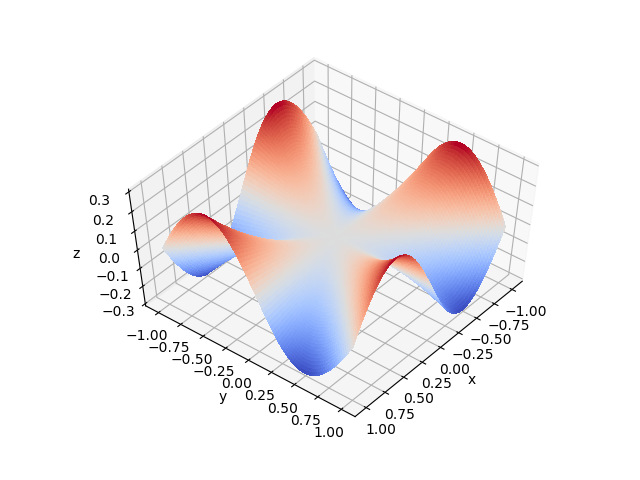

In [63]:
def f(x,y):
    return (x*y**3-x**3*y)/(x**2+y**2)

surface_show([-1, 1, -1, 1])

In [31]:
integrate((x+2)/(x**4-1), x)

# Szélsőérték számítás

In [7]:
y = Function("y")(x)
dy = Derivative(y, x)
ddy = Derivative(y, x, x)

## Szeparábilis differenciálegyenletek

<div class="exercises">
1.) $y'= -\frac{x}{y}.$
</div>

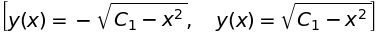

In [21]:
dsolve(Eq(dy, -x/y), y)

<div class="exercises">
2.) $y' = y(1-y)\frac{1}{x}.$
</div>

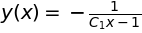

In [22]:
dsolve(Eq(dy, y*(y-1)/x), y)

<div class="exercises">
3.) $y'=\frac{y^2+4y+9}{(x-1)(x+5)}.$
</div>

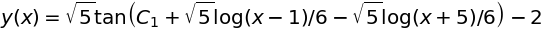

In [50]:
dsolve(Eq(dy, (y**2+4*y+9)/((x-1)*(x+5))), y)

<div class="exercises">
4.) $y'=\frac{2y^2+3}{y}2xe^{-4x^2}.$
</div>

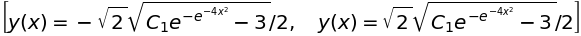

In [52]:
dsolve(Eq(dy, (2*y**2+3)/y*2*x*exp(-4*x**2)), y)

<div class="exercises">
5.) $y'=\frac{y^2+3}{y^2+1}2x\arctan(2x).$
</div>

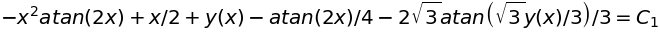

In [53]:
dsolve(Eq(dy, (y**2+3)/(y**2+1)*2*x*atan(2*x)), y)

<div class="exercises">
6.) $y(9+4x^2)y'=1.$
</div>

In [54]:
dsolve(Eq(y*(9+4*x**2)*dy, 1), y)

<div class="exercises">
7.) $1+2y+(4-x^2)y'=0.$
</div>

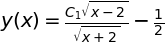

In [56]:
dsolve(Eq(1+2*y+(4-x**2)*dy, 0), y)

<div class="exercises">
8.) $x(x-1)y'+y(y-1)=0.$
</div>

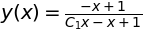

In [57]:
dsolve(Eq(x*(x-1)*dy+y*(y-1), 0), y)

<div class="exercises">
9.) Keressük meg az $$(1+x^3)y'-x^2y=0$$ differenciálegyenletnek azt 
az integrálgörbéjét, amely áthalad a $P(1, 2)$ ponton.
</div>

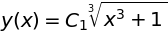

In [58]:
dsolve(Eq((1+x**3)*dy-x**2*y, 0), y)

$C_1=\sqrt[3]{2}.$

<div class="exercises">
10.) Írjuk fel az $$e^{y-x}+e^{x-y}y'=0$$ differenciálegyenlet origón 
áthaladó integrálgörbéjének az egyenletét.
</div>

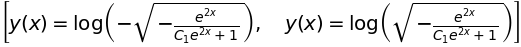

In [60]:
dsolve(Eq(exp(y-x)+exp(x-y)*dy, 0), y)

$C_1=-2$, $\quad$ $y(x)=\log\left( \sqrt{\frac{e^{2x}}{2e^{2x}-1}} \right)$.

<div class="exercises">
11.) $y(1+x^2)y'+x\sqrt{1-y^2}=0.$ 
</div>

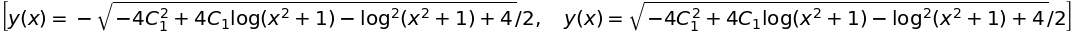

In [64]:
dsolve(Eq(y*(1+x**2)*dy+x*sqrt(1-y**2), 0), y)

<div class="exercises">
12.)  $y'=4\frac{\sin(2x)}{y},$ $\quad$ $y(0)=1$.
</div>

In [69]:
dsolve(Eq(dy, 4*sin(2*x)/y), y)

$C_1=5$, $\quad$ $y(x)=\sqrt{5-4\cos(2x)}$.

<div class="exercises">
13.)  $y'=-y\frac{1+2x^2}{x}$, $\quad$ $y(1)=2$.
</div>

In [70]:
dsolve(Eq(dy, -y*(1+2*x**2)/x), y)

$C_1=2e$, $\quad$ $y(x)=\frac{2}{x}e^{1-x^2}$.

<div class="exercises">
14.)  $y'=\frac{y^2-1}{x}$, $\quad$ $y(1)=2$.
</div>

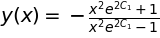

In [73]:
dsolve(Eq(dy, (y**2-1)/x), y)

In [74]:
C_1 = Symbol('C_1')
solve(-(exp(2*C_1)+1)/(exp(2*C_1)-1)-2, C_1)

$y(x)=\frac{3+x^2}{3-x^2}$.

## Szeparábilisra visszavezethető egyenletek

<div class="exercises">
1.) $x^2+y^2=xyy'$.
</div>

<p class="myp">$y=xu$ helyettesítés.</p>

In [9]:
dsolve(Eq(x**2+y**2, x*y*dy), y)

<div class="exercises">
2.) $x^2 y'=x^2+xy+y^2$.
</div>

<p class="myp">$y=xu$ helyettesítés.</p>

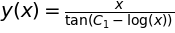

In [12]:
dsolve(Eq(x**2*dy, x**2+x*y+y**2), y)

## Elsőrendű egyenletek

<div class="exercises">
1.) $xy'+y=x^3$.
</div>

In [17]:
dsolve(Eq(x*dy + y, x**3), y)

<div class="exercises">
2.) $y'+4x^3 y=x^3 e^{x^4}$.
</div>

In [18]:
dsolve(Eq(dy+4*x**3*y, x**3*exp(x**4)), y)

## Másodrendű állandó együtthatós egyenletek

<div class="exercises">
1.) $2y''-9y'+4y=0$.
</div>

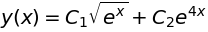

In [20]:
dsolve(Eq(2*ddy-9*dy+4*y, 0), y)

<div class="exercises">
2.) $y''-12y'+36y=0$.
</div>

In [21]:
dsolve(Eq(ddy-12*dy+36*y, 0), y)

<div class="exercises">
3.) $y''-4y'+13y=0$.
</div>

In [22]:
dsolve(Eq(ddy-4*dy+13*y, 0), y)

<div class="exercises">
4.) $y''-3y'+2y=e^x+2e^{3x}$.
</div>

In [23]:
dsolve(Eq(ddy-3*dy+2*y, exp(x)+2*exp(3*x)), y)

<div class="exercises">
5.) $y''-6y'+13y=x+\sin(3x)$.
</div>

In [24]:
dsolve(Eq(ddy-6*dy+13*y, x+sin(3*x)), y)

<div class="exercises">
6.) $y''+6y'+9y=2e^{-3x}$.
</div>

In [25]:
dsolve(Eq(ddy+6*dy+9*y, 2*exp(-3*x)), y)

<div class="exercises">
7.) $y''+4y=\cos(2x)$.
</div>

In [28]:
dsolve(Eq(ddy+4*y, cos(2*x)), y)

In [1]:
%%html
<style>
.output_subarea {
    background-color: cornsilk;
    border: 1px solid forestgreen;
    font-style:bold;
}

div.exercises {
    text-align: left; 
    font-family: 'Times New Roman'; 
    font-size:1.5em; 
    font-style:bold;
    border: 1px solid red;
    padding: 7px 3px 7px 8px;
    background-color: whitesmoke;
}

div.solution {
    font-size: 125%;
    background-color: cornsilk;
    border: 1px solid forestgreen;
    font-style:bold;
}

ol {    
    padding: 15px;
}

ol li {
    padding: 5px;
    margin-left: 25px;
}

ol ol li { 
    list-style-type: lower-alpha;
}

.myp {
    font-family: 'Times New Roman'; 
    font-size:1.4em; 
    font-style:bold;
    border: 1px solid black;
    padding: 5px 3px 5px 5px;
}
</style>

In [3]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>